# Analytical Solution of Fredholm Equation
This notebook is the symbolid code I used in my thesis at Univesity of New Brunswick, mainly third chapter, to show that Fourier transform and POD(PCA) are not equivalent in a homogeneous direction.

The `sympy` version is 1.3.

Total run time is about 30-45 minutes.

In [1]:
from sympy import symbols,sin,cos,integrate,expand,Matrix,simplify,pi,collect,I,init_printing
from IPython.display import display
init_printing()

In [2]:
def kernel(U):
    # forms the kernel from a base function
    V=U.subs(x,y)
    UV=expand(U*V.conjugate(),trig=True)
    K=simplify(integrate(UV,(t,0,2*pi),conds='none')/pi)
    return expand(K,trig=True)
def Vjs(K,Ui):
    # Factors the degenerate terms of Ui from the kernel
    Vj=Ui.copy()
    for i in range(Ui.shape[0]):
        Vj[i,0]=collect(K,Ui[i,0]).coeff(Ui[i,0])
    return Vj
def fredholmint(K,Ui):
    # Fredholm integral solution
    Vj=Vjs(K,Ui)
    if simplify((Ui.T*Vj)[0]-K):
        raise ValueError('Kernel is not degenerate')
    aij=simplify(integrate(Ui*Vj.conjugate().subs(y,x).T,(x,0,2*pi),conds='none')/pi)
    return aij,aij.eigenvects(simplify=True)
def eig_calc(cjs,ui):
    # Recovering eigenvalues
    ef = []
    ev = []
    for cj in cjs:
        if cj[0]==0: continue
        for i in range(cj[1]):
            ev.append(cj[0])
            ef.append(cj[2][i].T*ui)
#         eigs.append([cj[0],cj[2][0].T*ui])
    return Matrix(ev),Matrix(ef)
def eig_display(ev,ef):
    print('Eigenvalues = ',end=' ')
    display(evs)
    print('Eigenfunctions = ',end=' ')
    display(efs)
def fullrun(u,sublist=None):
    print('Function:')
    if sublist is not None:
        display(u.subs(sublist))
    else:
        display(u)
    k = kernel(u)
    aij, cjs = fredholmint(k,ui)
    evs, efs = eig_calc(cjs,ui)
    if sublist is not None:
        efs = efs.subs(sublist)
    print('Eigenvalues: ',end=' ')
    display(evs)
    print('Eigenfunctions: ',end=' ')
    display(efs)

In [3]:
c,d,e,x,y,t = symbols('c d e x y t',real=True)
a,b,f,g,m,n,o,p = symbols('a b f g m n o p',integer=True,real=True)
ui = Matrix([sin(a*x), sin(b*x), sin(f*x), sin(g*x), cos(a*x), cos(b*x), cos(f*x), cos(g*x)])
# Averaging in time
u1 = sin(a*x+m*t)
u2 = sin(a*x+m*t)+d*cos(a*x-m*t)
u3 = sin(a*x+m*t)+d*cos(a*x-m*t)+sin(b*x+m*t)+e*cos(b*x-m*t)
u4 = sin(a*x+m*t)+d*cos(a*x-m*t)+sin(b*x+n*t)+e*cos(b*x-n*t)
# Positive and negative frequencies of Fourier transform of u3 in time
Sp = +c*cos(a*x)+d*cos(b*x)+cos(a*x)+cos(b*x)-I*(c*sin(a*x)+d*sin(b*x)-sin(a*x)-sin(b*x))
Sn=-c*cos(a*x)-d*cos(b*x)-cos(a*x)+cos(b*x)+I*(c*sin(a*x)+d*sin(b*x)-sin(a*x)+sin(b*x))
# Numerical test function
u5 = sin(a*x+m*t)+2*cos(a*x-m*t)+sin(b*x+n*t)+4*cos(b*x-n*t)+2.5*sin(f*x+o*t)+3.5*cos(f*x-o*t)+2*sin(g*x+p*t)+2*cos(g*x-p*t)
sublist = [(a,3), (b,5), (f,7), (g,11), (m,1), (n,2), (o,3), (p,6)]

# Analytical Test Functions

Function:


Eigenvalues:  

Eigenfunctions:  

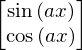

In [4]:
fullrun(u1)

Function:


Eigenvalues:  

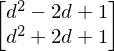

Eigenfunctions:  

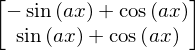

In [5]:
fullrun(u2)

Function:


Eigenvalues:  

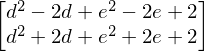

Eigenfunctions:  

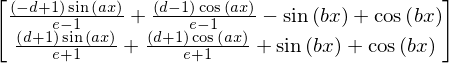

In [6]:
fullrun(u3)

Function:


Eigenvalues:  

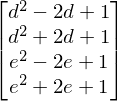

Eigenfunctions:  

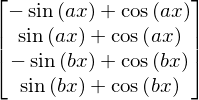

In [7]:
fullrun(u4)

# Positive and Negative Frequencies of u3

Function:


Eigenvalues:  

Eigenfunctions:  

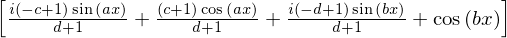

In [8]:
fullrun(Sp)

Function:


Eigenvalues:  

Eigenfunctions:  

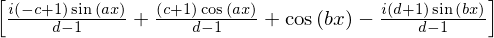

In [9]:
fullrun(Sn)

# Numerical Test Function

Function:


Eigenvalues:  

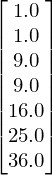

Eigenfunctions:  

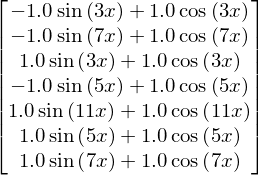

In [10]:
fullrun(u5,sublist)